In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn import ensemble
from scipy import stats as st 
from sklearn import linear_model,datasets

from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_csv(r"D:\ml\adult-census-income\adult.csv")

In [3]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [4]:
# Setting all the categorical columns to type category
for col in set(data.columns) - set(data.describe().columns):
    data[col] = data[col].astype('category')
    
print('## 1.1. Columns and their types')
print(data.info())

## 1.1. Columns and their types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null category
fnlwgt            32561 non-null int64
education         32561 non-null category
education.num     32561 non-null int64
marital.status    32561 non-null category
occupation        32561 non-null category
relationship      32561 non-null category
race              32561 non-null category
sex               32561 non-null category
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null category
income            32561 non-null category
dtypes: category(9), int64(6)
memory usage: 1.8 MB
None


In [5]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


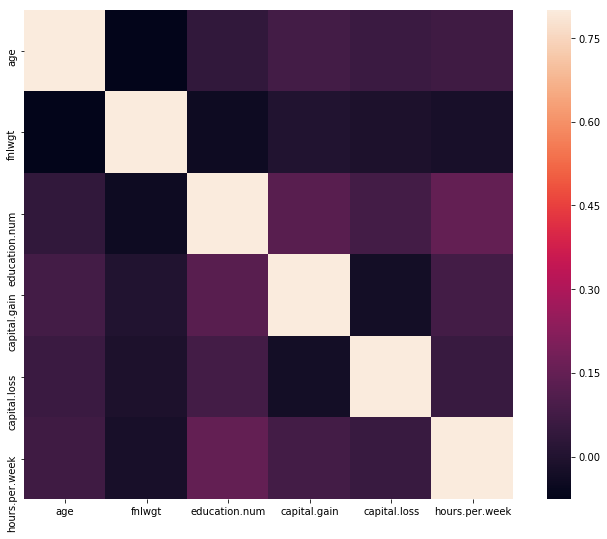

In [7]:
corrmat = data.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [9]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
print('## 1.4. Missing values')
for i,j in zip(data.columns,(data.values.astype(str) == '?').sum(axis = 0)):
    if j > 0:
        print(str(i) + ': ' + str(j) + ' records')

## 1.4. Missing values
workclass: 1836 records
occupation: 1843 records
native.country: 583 records


In [11]:
"""Treating Missing Values by predicting them
I fill the missing values in each of the three columns by predicting their values. For each of the three columns, I use all the attributes (including 'income') as independent variables and treat that column as the dependent variable, making it a multi-class classification task. I use three classification algorithms, namely, logistic regression, decision trees and random forest to predict the class when the value is missing (in this case a '?'). I then take a majority vote amongst the three classifiers to be the class of the missing value. In case of a tie, I pick the majority class of that column using the entire dataset."""

"Treating Missing Values by predicting them\nI fill the missing values in each of the three columns by predicting their values. For each of the three columns, I use all the attributes (including 'income') as independent variables and treat that column as the dependent variable, making it a multi-class classification task. I use three classification algorithms, namely, logistic regression, decision trees and random forest to predict the class when the value is missing (in this case a '?'). I then take a majority vote amongst the three classifiers to be the class of the missing value. In case of a tie, I pick the majority class of that column using the entire dataset."

In [12]:
def oneHotCatVars(df, df_cols):
    
    df_1 = adult_data = df.drop(columns = df_cols, axis = 1)
    df_2 = pd.get_dummies(df[df_cols])
    
    return (pd.concat([df_1, df_2], axis=1, join='inner'))

In [13]:

print('## 1.5. Correlation Matrix')

display(data.corr())

print('We see that none of the columns are highly correlated.')
print('### 1.4.1. Filling in missing values for Attribute workclass')

## 1.5. Correlation Matrix


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


We see that none of the columns are highly correlated.
### 1.4.1. Filling in missing values for Attribute workclass


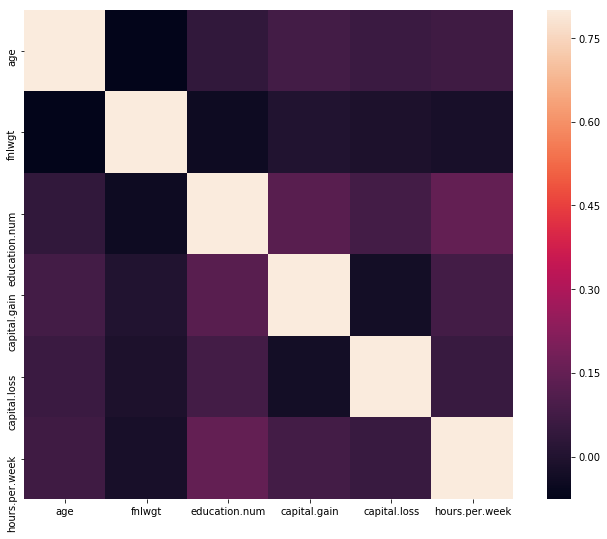

In [14]:
corrmat = data.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [15]:
test_data = data[(data.workclass.values == '?')].copy()
test_label = test_data.workclass

In [16]:
train_data = data[(data.workclass.values != '?')].copy()
train_label = train_data.workclass

In [17]:
test_data.drop(columns = ['workclass'], inplace = True)

In [18]:
train_data.drop(columns = ['workclass'], inplace = True)

In [19]:
train_data = oneHotCatVars(train_data, train_data.select_dtypes('category').columns)

In [20]:
test_data = oneHotCatVars(test_data, test_data.select_dtypes('category').columns)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [22]:

test_data = data[(data.workclass.values == '?')].copy()
test_label = test_data.workclass

train_data = data[(data.workclass.values != '?')].copy()
train_label = train_data.workclass

test_data.drop(columns = ['workclass'], inplace = True)
train_data.drop(columns = ['workclass'], inplace = True)

train_data = oneHotCatVars(train_data, train_data.select_dtypes('category').columns)
test_data = oneHotCatVars(test_data, test_data.select_dtypes('category').columns)

log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data, train_label)
r_forest_pred = r_forest.predict(test_data)

majority_class = data.workclass.value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': r_forest_pred, 'DTree' : clf_pred, 'LogReg' : log_reg_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

data.loc[(data.workclass.values == '?'),'workclass'] = overall_pred.values
print(data.workclass.value_counts())
print(data.workclass.unique())

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Private             24153
Self-emp-not-inc     2544
Local-gov            2095
State-gov            1298
Self-emp-inc         1116
Federal-gov           962
Never-worked          379
Without-pay            14
?                       0
Name: workclass, dtype: int64
[Private, State-gov, Federal-gov, Self-emp-not-inc, Self-emp-inc, Local-gov, Never-worked, Without-pay]
Categories (8, object): [Private, State-gov, Federal-gov, Self-emp-not-inc, Self-emp-inc, Local-gov, Never-worked, Without-pay]


In [23]:
overall_pred 

0                Private
1                Private
2                Private
3                Private
4                Private
5                Private
6                Private
7                Private
8                Private
9                Private
10               Private
11               Private
12               Private
13               Private
14               Private
15               Private
16               Private
17               Private
18          Never-worked
19               Private
20               Private
21               Private
22               Private
23               Private
24               Private
25               Private
26               Private
27               Private
28               Private
29               Private
              ...       
1806             Private
1807        Never-worked
1808             Private
1809        Never-worked
1810    Self-emp-not-inc
1811             Private
1812        Never-worked
1813         Federal-gov
1814        Never-worked


In [24]:
majority_class 

'Private'

In [25]:
pred_df 

,RFor,DTree,LogReg
0,State-gov,Local-gov,Private
1,Private,Private,Private
2,Private,Private,Private
3,Private,Private,Private
4,Self-emp-not-inc,Private,Private
5,Private,Private,Private
6,Self-emp-not-inc,Private,Private
7,Private,Federal-gov,Private
8,Self-emp-not-inc,Local-gov,Private
9,Private,State-gov,Private


In [26]:
print('### 1.4.2. Filling in missing values for Occupation occupation')

test_data = data[(data.occupation.values == '?')].copy()
test_label = test_data.occupation

train_data = data[(data.occupation.values != '?')].copy()
train_label = train_data.occupation

test_data.drop(columns = ['occupation'], inplace = True)
train_data.drop(columns = ['occupation'], inplace = True)

train_data = oneHotCatVars(train_data, train_data.select_dtypes('category').columns)
test_data = oneHotCatVars(test_data, test_data.select_dtypes('category').columns)

log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data, train_label)
r_forest_pred = r_forest.predict(test_data)


majority_class = data.occupation.value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': r_forest_pred, 'DTree' : clf_pred, 'LogReg' : log_reg_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

data.loc[(data.occupation.values == '?'),'occupation'] = overall_pred.values
print(data.occupation.value_counts())
print(data.occupation.unique())

### 1.4.2. Filling in missing values for Occupation occupation


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Prof-specialty       5188
Craft-repair         4247
Exec-managerial      4186
Adm-clerical         3878
Sales                3732
Other-service        3513
Machine-op-inspct    2040
Transport-moving     1621
Handlers-cleaners    1393
Farming-fishing      1010
Tech-support          938
Protective-serv       653
Priv-house-serv       153
Armed-Forces            9
?                       0
Name: occupation, dtype: int64
[Exec-managerial, Prof-specialty, Machine-op-inspct, Other-service, Adm-clerical, ..., Farming-fishing, Tech-support, Protective-serv, Armed-Forces, Priv-house-serv]
Length: 14
Categories (14, object): [Exec-managerial, Prof-specialty, Machine-op-inspct, Other-service, ..., Tech-support, Protective-serv, Armed-Forces, Priv-house-serv]


In [27]:
print('### 1.4.3. Filling in missing values for Native Country')

test_data = data[(data['native.country'].values == '?')].copy()
test_label = test_data['native.country']

train_data = data[(data['native.country'].values != '?')].copy()
train_label = train_data['native.country']

test_data.drop(columns = ['native.country'], inplace = True)
train_data.drop(columns = ['native.country'], inplace = True)

train_data = oneHotCatVars(train_data, train_data.select_dtypes('category').columns)
test_data = oneHotCatVars(test_data, test_data.select_dtypes('category').columns)

log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data, train_label)
r_forest_pred = r_forest.predict(test_data)


majority_class = data['native.country'].value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': r_forest_pred, 'DTree' : clf_pred, 'LogReg' : log_reg_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

data.loc[(data['native.country'].values == '?'),'native.country'] = overall_pred.values
print(data['native.country'].value_counts())
print(data['native.country'].unique())

### 1.4.3. Filling in missing values for Native Country


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


United-States                 29726
Mexico                          649
Philippines                     205
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           101
Cuba                             96
England                          90
South                            84
Jamaica                          81
China                            76
Italy                            73
Dominican-Republic               70
Vietnam                          68
Guatemala                        64
Japan                            62
Columbia                         60
Poland                           60
Taiwan                           52
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [28]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [29]:
print('## 1.5. Correlation Matrix')

display(data.corr())


## 1.5. Correlation Matrix


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [30]:
# Resetting the categories

data['workclass'] = data['workclass'].cat.remove_categories('?')
data['occupation'] = data['occupation'].cat.remove_categories('?')
data['native.country'] = data['native.country'].cat.remove_categories('?')


In [31]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [32]:
print('## 1.5. Correlation Matrix')

display(data.corr())



## 1.5. Correlation Matrix


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [33]:
city_category = np.unique(data['education.num'])
city_category

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [34]:
city_category = np.unique(data['education'])
city_category

array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'],
      dtype=object)

In [35]:
# Creating a dictionary that contain the education and it's corresponding education level
edu_level = {}
for x,y in data[['education.num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x

## 2.1. Education vs Income


Text(0, 0.5, 'Proportion of population')

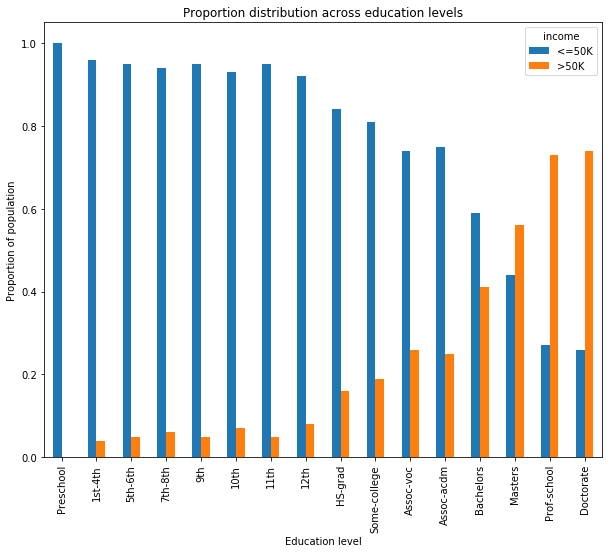

In [36]:
print('## 2.1. Education vs Income')
education = round(pd.crosstab(data.education, data.income).div(pd.crosstab(data.education, data.income).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))

ax = education.plot(kind ='bar', title = 'Proportion distribution across education levels', figsize = (10,8))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')



In [37]:
print('As the education increase income also increased')

As the education increase income also increased


In [38]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## 2.2 Sex vs Income


Text(0, 0.5, 'Proportion of population')

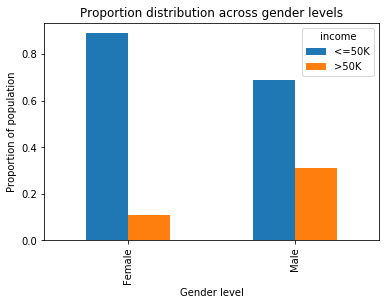

In [39]:
print('## 2.2 Sex vs Income')

gender = round(pd.crosstab(data.sex, data.income).div(pd.crosstab(data.sex, data.income).apply(sum,1),0),2)
gender.sort_values(by = '>50K', inplace = True)
ax = gender.plot(kind ='bar', title = 'Proportion distribution across gender levels')
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

In [40]:
print("from this we can infere that the there is wage gap between male and female but we dont know any fixed value ")

from this we can infere that the there is wage gap between male and female but we dont know any fixed value 


Text(17.200000000000003, 0.5, 'Proportion of population')

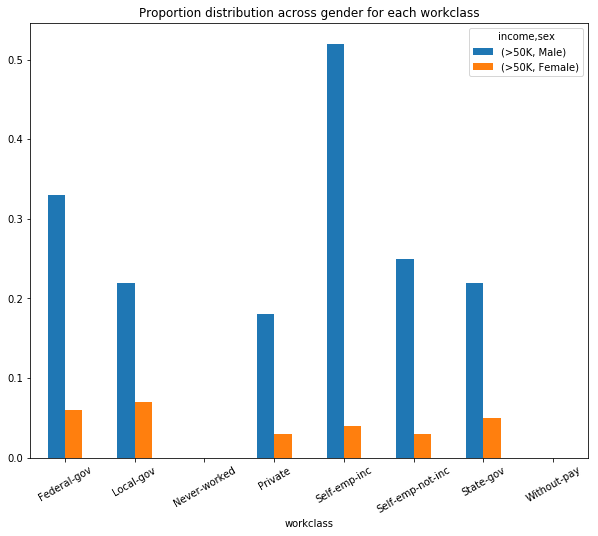

In [41]:
gender_workclass = round(pd.crosstab(data.workclass, [data.income, data.sex]).div(pd.crosstab(data.workclass, [data.income, data.sex]).apply(sum,1),0),2)
gender_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = 'Proportion distribution across gender for each workclass', figsize = (10,8), rot = 30)
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

In [42]:
print("varius distribution of money on different platform where money is greater than 50k")

varius distribution of money on different platform where money is greater than 50k


varius distribution of money on different platform where money is less than 50k


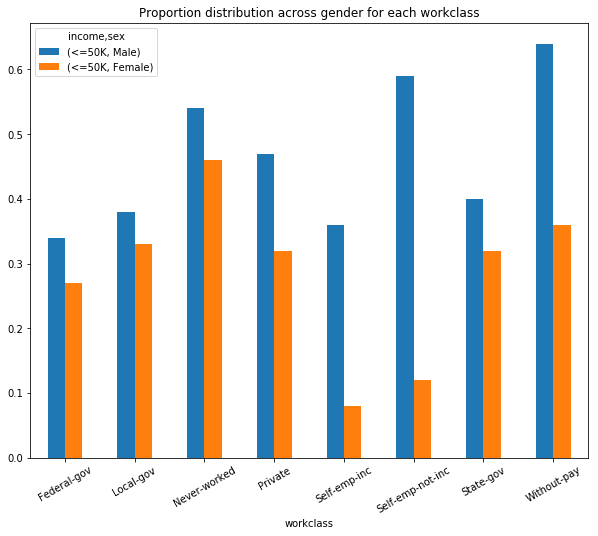

In [43]:
gender_workclass = round(pd.crosstab(data.workclass, [data.income, data.sex]).div(pd.crosstab(data.workclass, [data.income, data.sex]).apply(sum,1),0),2)
gender_workclass[[('<=50K','Male'), ('<=50K','Female')]].plot(kind = 'bar', title = 'Proportion distribution across gender for each workclass', figsize = (10,8), rot = 30)
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')
print("varius distribution of money on different platform where money is less than 50k")

 2.3. Occupation vs Income
Occupation category having ='private-house-servant 'has higher percentage of people more than 50 k
Occupation category having ='exec-managerical 'has higher percentage of people more than 50 k


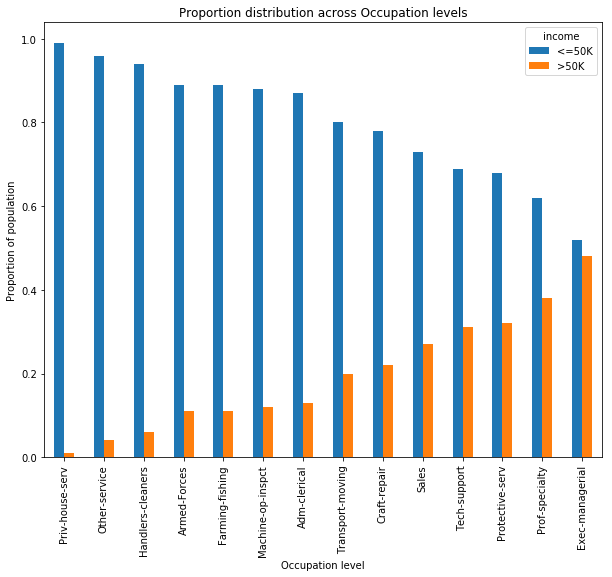

In [44]:
print(' 2.3. Occupation vs Income')

occupation = round(pd.crosstab(data.occupation, data.income).div(pd.crosstab(data.occupation, data.income).apply(sum,1),0),2)
occupation.sort_values(by = '>50K', inplace = True)
ax = occupation.plot(kind ='bar', title = 'Proportion distribution across Occupation levels', figsize = (10,8))
ax.set_xlabel('Occupation level')
ax.set_ylabel('Proportion of population')
print("Occupation category having ='private-house-servant 'has higher percentage of people more than 50 k")
print("Occupation category having ='exec-managerical 'has higher percentage of people more than 50 k")


 2.4. Workclass vs Income


Text(0, 0.5, 'Proportion of population')

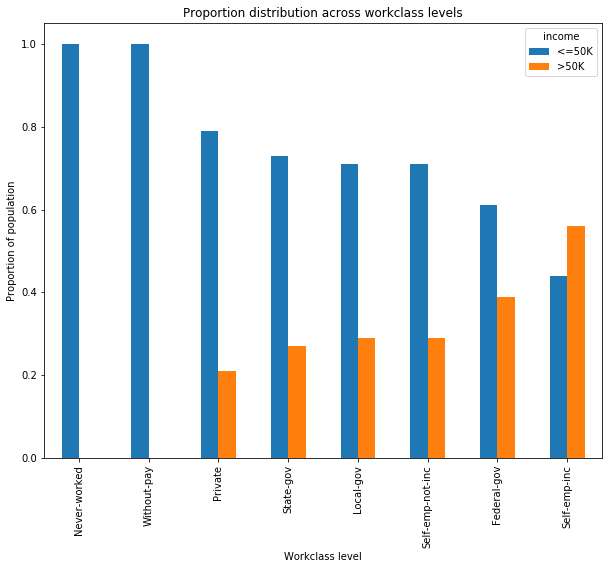

In [45]:
print(' 2.4. Workclass vs Income')

workclass = round(pd.crosstab(data.workclass, data.income).div(pd.crosstab(data.workclass, data.income).apply(sum,1),0),2)
workclass.sort_values(by = '>50K', inplace = True)
ax = workclass.plot(kind ='bar', title = 'Proportion distribution across workclass levels', figsize = (10,8))
ax.set_xlabel('Workclass level')
ax.set_ylabel('Proportion of population')

## 2.5. Race vs Income



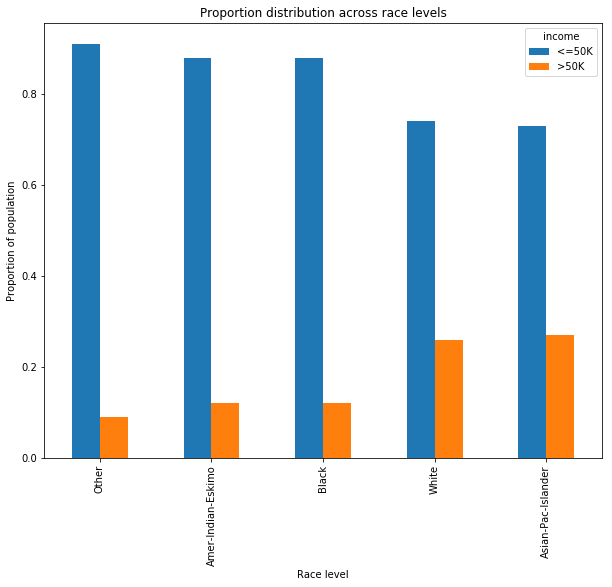

In [46]:
print('## 2.5. Race vs Income')

race = round(pd.crosstab(data.race, data.income).div(pd.crosstab(data.race, data.income).apply(sum,1),0),2)
race.sort_values(by = '>50K', inplace = True)
ax = race.plot(kind ='bar', title = 'Proportion distribution across race levels', figsize = (10,8))
ax.set_xlabel('Race level')
ax.set_ylabel('Proportion of population')

print()

## 2.6. Native Country
From the graph, we notice a trend in positioning of the country. South American country are at the left end of the plot, with low proportion of population that make more than 50k a year. The United States is located somewhat centrally, and at the right are countries from Europe and Asia, with higher proportion of population that make more than 50k a year.


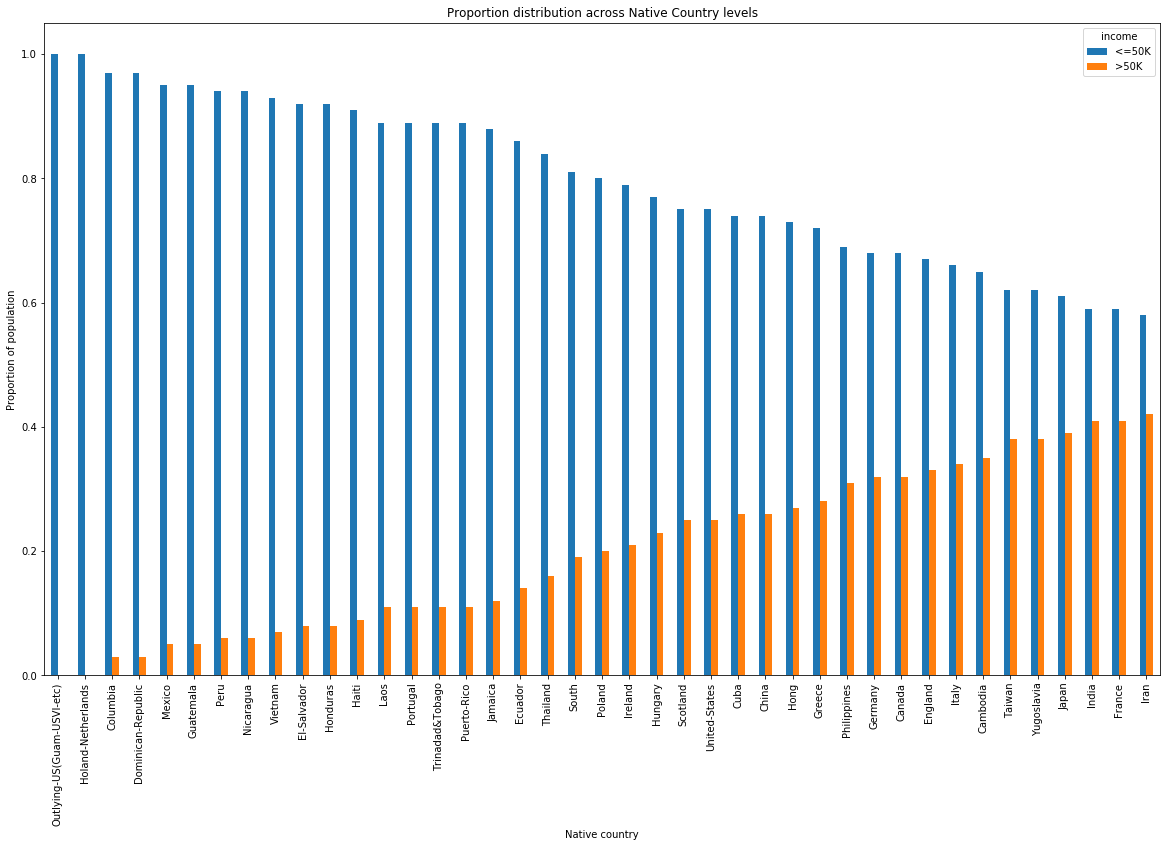

In [47]:
print('## 2.6. Native Country')

native_country = round(pd.crosstab(data['native.country'], data.income).div(pd.crosstab(data['native.country'], data.income).apply(sum,1),0),2)
native_country.sort_values(by = '>50K', inplace = True)
ax = native_country.plot(kind ='bar', title = 'Proportion distribution across Native Country levels', figsize = (20,12))
ax.set_xlabel('Native country')
ax.set_ylabel('Proportion of population')
print("From the graph, we notice a trend in positioning of the country. South American country are at the left end of the plot, with low proportion of population that make more than 50k a year. The United States is located somewhat centrally, and at the right are countries from Europe and Asia, with higher proportion of population that make more than 50k a year.")

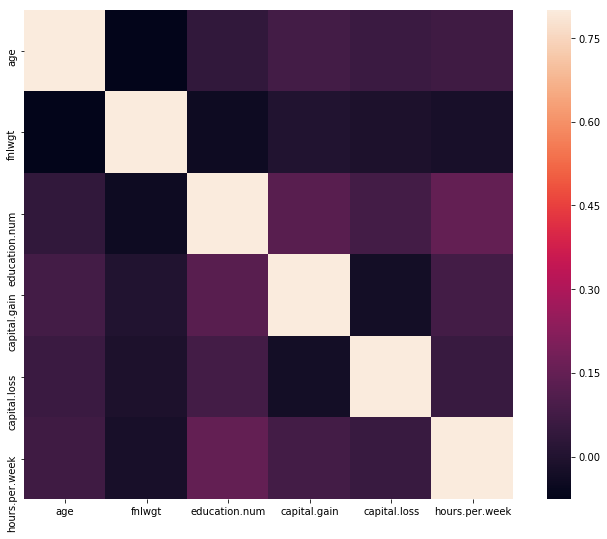

In [48]:
corrmat = data.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [49]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [50]:
for col in set(data.columns) - set(data.describe().columns):
    data[col] = data[col].astype('category')
    
print('## 1.1. Columns and their types')
print(data.info())

## 1.1. Columns and their types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null category
fnlwgt            32561 non-null int64
education         32561 non-null category
education.num     32561 non-null int64
marital.status    32561 non-null category
occupation        32561 non-null category
relationship      32561 non-null category
race              32561 non-null category
sex               32561 non-null category
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null category
income            32561 non-null category
dtypes: category(9), int64(6)
memory usage: 1.8 MB
None


In [59]:
data.drop(columns = ['education','fnlwgt','hours.per.week'], inplace = True)

print('* For education level, we have 2 features that convey the same meaning, \'education\' \
        and \'educational-num\'. To avoid the effect of this attribute on the models to be \
        overstated, I am not going to use the categorical education attribute.')
print('* I use the categorical Hours work column and drop the \'hour-per-week\' column')
print( '*Also, I chose not to use the \'Fnlwgt\' attribute that is used by the census, \
        as the inverse of sampling fraction adjusted for non-response and over or under sampling \
        of particular groups. This attribute does not convey individual related meaning.')

* For education level, we have 2 features that convey the same meaning, 'education'         and 'educational-num'. To avoid the effect of this attribute on the models to be         overstated, I am not going to use the categorical education attribute.
* I use the categorical Hours work column and drop the 'hour-per-week' column
*Also, I chose not to use the 'Fnlwgt' attribute that is used by the census,         as the inverse of sampling fraction adjusted for non-response and over or under sampling         of particular groups. This attribute does not convey individual related meaning.


## Box plot


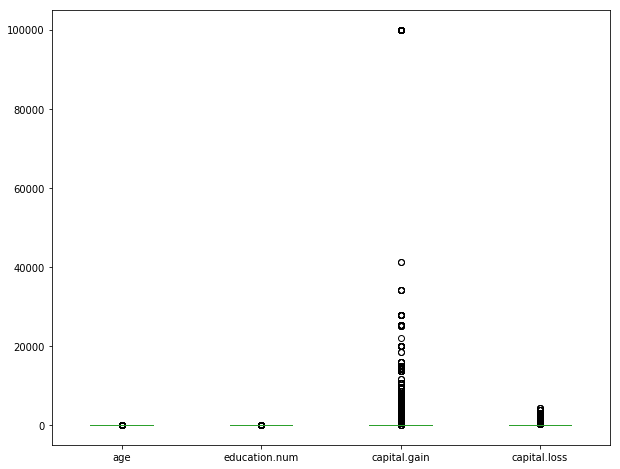

In [60]:
print('## Box plot')
data.select_dtypes(exclude = 'category').plot(kind = 'box', figsize = (10,8))

In [65]:
print('Normalization happens on the training dataset, by removing the mean and  scaling to unit variance. These values are stored and then later applied  to the test data before the test data is passed to the model for prediction. ')

Normalization happens on the training dataset, by removing the mean and  scaling to unit variance. These values are stored and then later applied  to the test data before the test data is passed to the model for prediction. 


In [ ]:
"""
4. Model Development & Classification
4.1. Data Preparation'
One-hot encoding is the process of representing multi-class categorical features as binary features, one for each class. Although this process increases the dimensionality of the dataset, classification algorithms tend to work better on this format of data.

I use one-hot encoding to represent all the categorical features in the dataset."""

In [66]:
# Data Prep
adult_data = data.drop(columns = ['income'])
adult_label = data.income


adult_cat_1hot = pd.get_dummies(data.select_dtypes('category'))
adult_non_cat = data.select_dtypes(exclude = 'category')

adult_data_1hot = pd.concat([adult_non_cat, adult_cat_1hot], axis=1, join='inner')

In [69]:
#  Train - Test split
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(adult_data_1hot, adult_label, test_size  = 0.25)


In [70]:
# Normalization
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

# Fitting only on training data
scaler.fit(train_data)  
train_data = scaler.transform(train_data)  

# Applying same transformation to test data
test_data = scaler.transform(test_data)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  import sys
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [71]:
def model_eval(actual, pred):
    
    confusion = pd.crosstab(actual, pred, rownames=['Actual'], colnames=['Predicted'])
    TP = confusion.loc['>50K','>50K']
    TN = confusion.loc['<=50K','<=50K']
    FP = confusion.loc['<=50K','>50K']
    FN = confusion.loc['>50K','<=50K']

    accuracy = ((TP+TN))/(TP+FN+FP+TN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    f_measure = (2*recall*precision)/(recall+precision)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    error_rate = 1 - accuracy
    
    out = {}
    out['accuracy'] =  accuracy
    out['precision'] = precision
    out['recall'] = recall
    out['f_measure'] = f_measure
    out['sensitivity'] = sensitivity
    out['specificity'] = specificity
    out['error_rate'] = error_rate
    
    return out

In [72]:
"""4.2. Model Development
4.2.1. Decision Tree
For the decision tree classifier, I experimented with the splitting criteria, minimum samples required to split, max depth of the tree, minimum samples required at the leaf level and the maximum features to consider when looking for the best split. The following values of the parameters attained the best accuracy during classification. Results in the table below.

Splitting criteria: Gini Index (Using Gini Index marginally outperformed Entropy with a higher accuracy.)
Min samples required to split: 5% (Best amongst 1%, 10% and 5%.)
Max Depth: None
Min samples required at leaf: 0.1 % (Best amongst 1%, 5% and 0.1%.)
Max features: number of features (Performs better than 'auto', 'log2' and 'sqrt'.)
"""

"4.2. Model Development\n4.2.1. Decision Tree\nFor the decision tree classifier, I experimented with the splitting criteria, minimum samples required to split, max depth of the tree, minimum samples required at the leaf level and the maximum features to consider when looking for the best split. The following values of the parameters attained the best accuracy during classification. Results in the table below.\n\nSplitting criteria: Gini Index (Using Gini Index marginally outperformed Entropy with a higher accuracy.)\nMin samples required to split: 5% (Best amongst 1%, 10% and 5%.)\nMax Depth: None\nMin samples required at leaf: 0.1 % (Best amongst 1%, 5% and 0.1%.)\nMax features: number of features (Performs better than 'auto', 'log2' and 'sqrt'.)\n"

In [73]:
print('### 3.1.1. Model Development ')

# Gini 
clf_gini = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_split = 0.05, min_samples_leaf = 0.001, max_features = None)
clf_gini = clf_gini.fit(train_data, train_label)
clf_gini_pred = clf_gini.predict(test_data)
DTree_Gini = model_eval(test_label, clf_gini_pred)
print('Desicion Tree using Gini Index : %.2f percent.' % (round(DTree_Gini['accuracy']*100,2)))


# Entropy
clf_entropy = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 0.05, min_samples_leaf = 0.001)
clf_entropy = clf_entropy.fit(train_data, train_label)
clf_entropy_pred = clf_entropy.predict(test_data)
DTree_Entropy = model_eval(test_label, clf_entropy_pred)
print('Desicion Tree using Entropy : %.2f percent.' % (round(DTree_Entropy['accuracy']*100,2)))

print('### 3.1.2. Model Evaulation ')
ovl_dtree = round(pd.DataFrame([DTree_Entropy, DTree_Gini], index = ['DTree_Entropy','DTree_Gini']),4)
display(ovl_dtree)

### 3.1.1. Model Development 
Desicion Tree using Gini Index : 100.00 percent.
Desicion Tree using Entropy : 100.00 percent.
### 3.1.2. Model Evaulation 


,accuracy,error_rate,f_measure,precision,recall,sensitivity,specificity
DTree_Entropy,1.0,0.0,1.0,1.0,1.0,1.0,1.0
DTree_Gini,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
"""For the ANN classifier, I experimented with the activation function, the solver for weight optimization, regularization term and learning schedule for weight updates. The following values of the parameters attained the best accuracy during classification. Other parameters were neither applicable to the 'adam' solver nor did it improve the performance of the model. Results in the table below.

Activation: Logistic (Marginally outperformed 'relu', 'tanh' and 'identity' functions.)
Solver: Adam (Works well on relatively large datasets with thousands of training samples or more)
Alpha: 1e-4 (Best amongst 1, 1e-1, 1e-2, 1e-3, 1e-4 and 1e-5)
Learning Rate: 'invscaling' (Gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'.)"""

In [81]:
from sklearn.neural_network import MLPClassifier
ann_tanh = MLPClassifier(activation = 'tanh', solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(10, 2), random_state=1, warm_start=True)
ann_tanh.fit(train_data, train_label)                         
ann_tanh_pred = ann_tanh.predict(test_data)
ANN_TanH = model_eval(test_label, ann_tanh_pred)
print('ANN using TanH and lbfgs solver : %.2f percent.' % (round(ANN_TanH['accuracy']*100,2)))


# Relu
ann_relu = MLPClassifier(activation = 'relu', solver='adam', alpha=1e-1, 
                    hidden_layer_sizes=(5, 2), random_state=1,
                    learning_rate  = 'invscaling',
                    warm_start = True)
ann_relu.fit(train_data, train_label)                         
ann_relu_pred = ann_relu.predict(test_data)
ANN_relu = model_eval(test_label, ann_relu_pred)
print('ANN using relu and adam solver : %.2f percent.' % (round(ANN_relu['accuracy']*100,2)))

# Log
ann_log = MLPClassifier(activation = 'logistic', solver='adam', 
                    alpha=1e-4, hidden_layer_sizes=(5, 2),
                    learning_rate  = 'invscaling', 
                    random_state=1, warm_start = True)
ann_log.fit(train_data, train_label)                         
ann_log_pred = ann_log.predict(test_data)
ANN_log = model_eval(test_label, ann_log_pred)
print('ANN using logistic and adam solver : %.2f percent.' % (round(ANN_log['accuracy']*100,2)))

# Identity
ann_identity = MLPClassifier(activation = 'identity', solver='adam', alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=1, warm_start = True)
ann_identity.fit(train_data, train_label)                         
ann_identity_pred = ann_identity.predict(test_data)
ANN_identity = model_eval(test_label, ann_identity_pred)
print('ANN using identity and adam solver : %.2f percent.' % (round(ANN_identity['accuracy']*100,2)))

#printmd('### 3.2.2. Model Evaulation ')
ovl_ann = round(pd.DataFrame([ANN_TanH, ANN_relu, ANN_log, ANN_identity], index = ['ANN_TanH','ANN_relu', 'ANN_log', 'ANN_identity']),4)
display(ovl_ann)

ANN using TanH and lbfgs solver : 99.99 percent.
ANN using relu and adam solver : 100.00 percent.
ANN using logistic and adam solver : 100.00 percent.
ANN using identity and adam solver : 100.00 percent.


,accuracy,error_rate,f_measure,precision,recall,sensitivity,specificity
ANN_TanH,0.9999,0.0001,0.9998,0.9995,1.0,1.0,0.9998
ANN_relu,1.0000,0.0000,1.0000,1.0000,1.0,1.0,1.0000
ANN_log,1.0000,0.0000,1.0000,1.0000,1.0,1.0,1.0000
ANN_identity,1.0000,0.0000,1.0000,1.0000,1.0,1.0,1.0000


In [ ]:
"""4.2.3. Support Vector Machine
For the SVM classifier, I experimented with the various available kernels, the penalty of the error term and the tolerance for stopping criteria. The following values of the parameters attained the best accuracy during classification. Results in the table below.

Kernel: rbf (Marginally outperformed 'linear, 'poly' and 'sigmoid' kernels.)
C, penalty of the error term: 1 (Best amongst 0.1, 0.5, 1 and 10)
Tolerance for stopping criteria: 1e-3 (Best amongst 1e-1, 1e-2, 1e-3, 1e-4 and 1e-5)"""

In [83]:
from sklearn import svm
# rbf kernal
svm_clf_rbf = svm.SVC(kernel = 'rbf', C = 1, tol = 1e-3)
svm_clf_rbf.fit(train_data, train_label)
svm_clf_rbf_pred = svm_clf_rbf.predict(test_data)
SVM_rbf = model_eval(test_label, svm_clf_rbf_pred)
print('SVM using rbf kernel : %.2f percent.' % (round(SVM_rbf['accuracy']*100,2)))

# Linear kernel
svm_clf_linear = svm.SVC(kernel = 'linear')
svm_clf_linear.fit(train_data, train_label)
svm_clf_linear_pred = svm_clf_linear.predict(test_data)
SVM_linear = model_eval(test_label, svm_clf_linear_pred)
print('SVM using linear kernel : %.2f percent.' % (round(SVM_linear['accuracy']*100,2)))


# Poly kernal
svm_clf_poly = svm.SVC(kernel = 'poly')
svm_clf_poly.fit(train_data, train_label)
svm_clf_poly_pred = svm_clf_poly.predict(test_data)
SVM_poly = model_eval(test_label, svm_clf_poly_pred)
print('SVM using poly kernel : %.2f percent.' % (round(SVM_poly['accuracy']*100,2)))


svm_clf_sigmoid = svm.SVC(kernel = 'sigmoid')
svm_clf_sigmoid.fit(train_data, train_label)
svm_clf_sigmoid_pred = svm_clf_sigmoid.predict(test_data)
SVM_sigmoid = model_eval(test_label, svm_clf_sigmoid_pred)
print('SVM using sigmoid kernel : %.2f percent.' % (round(SVM_sigmoid['accuracy']*100,2)))



#printmd('### 3.3.2. Model Evaulation ')
ovl_svm = round(pd.DataFrame([SVM_rbf, SVM_linear, SVM_poly, SVM_sigmoid], index = ['SVM_rbf','SVM_linear', 'SVM_poly', 'SVM_sigmoid']),4)
display(ovl_svm)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM using rbf kernel : 99.53 percent.
SVM using linear kernel : 100.00 percent.


D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM using poly kernel : 100.00 percent.


D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM using sigmoid kernel : 99.89 percent.


,accuracy,error_rate,f_measure,precision,recall,sensitivity,specificity
SVM_rbf,0.9953,0.0047,0.9905,0.9995,0.9816,0.9816,0.9998
SVM_linear,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
SVM_poly,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
SVM_sigmoid,0.9989,0.0011,0.9978,0.9990,0.9965,0.9965,0.9997


In [ ]:
"""
4.2.4. Ensemble Models
4.2.4.1. Random Forest
For the random forests classifier, I experimented with the number of trees, splitting criteria, minimum samples required to split, max depth of the tree, minimum samples required at the leaf level and the maximum features to consider when looking for the best split. The following values of the parameters attained the best accuracy during classification. Results in the table below.

Num estimators: 100 (Best amongst 10, 50 and 100)
Splitting criteria: Gini Index (Using Gini Index marginally outperformed Entropy with a higher accuracy.)
Min samples required to split: 5% (Best amongst 1%, 10% and 5%.)
Max Depth: None
Min samples required at leaf: 0.1 % (Best amongst 1%, 5% and 0.1%.)
Max features: number of features (Performs better than 'auto', 'log2' and 'sqrt'.)"""

In [84]:
# Gini
r_forest_gini = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001)
r_forest_gini.fit(train_data, train_label)
r_forest_gini_pred = r_forest_gini.predict(test_data)
rforest_gini = model_eval(test_label, r_forest_gini_pred)
print('Random Forest using Gini Index : %.2f percent.' % (round(rforest_gini['accuracy']*100,2)))

# Entropy
r_forest_entropy = RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001)
r_forest_entropy.fit(train_data, train_label)
r_forest_entropy_pred = r_forest_entropy.predict(test_data)
rforest_entropy = model_eval(test_label, r_forest_entropy_pred)
print('Random Forest using Entropy : %.2f percent.' % (round(rforest_entropy['accuracy']*100,2)))

#printmd('### 3.4.1.2. Model Evaulation ')
ovl_rf = round(pd.DataFrame([rforest_gini, rforest_entropy], index = ['rforest_gini','rforest_entropy']),4)
display(ovl_rf)

Random Forest using Gini Index : 100.00 percent.
Random Forest using Entropy : 100.00 percent.


,accuracy,error_rate,f_measure,precision,recall,sensitivity,specificity
rforest_gini,1.0,0.0,1.0,1.0,1.0,1.0,1.0
rforest_entropy,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
"""4.2.4.2. Adaboost
For the adaboost classifier, I experimented with base estimator from which the boosted ensemble is built and number of estimators. The following values of the parameters attained the best accuracy during classification. Results in the table below.

Base Estimator: DecisionTreeClassifier

Num estimators: 100 (Best amongst 10, 50 and 100.)"""

In [85]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)                     
ada.fit(train_data, train_label)
ada_pred = ada.predict(test_data)
adaboost = model_eval(test_label, ada_pred)
print('Adaboost : %.2f percent.' % (round(adaboost['accuracy']*100,2)))

#printmd('### 3.4.2.2. Model Evaulation ')
ovl_ada = round(pd.DataFrame([adaboost], index = ['adaboost']),4)
display(ovl_ada)

Adaboost : 100.00 percent.


,accuracy,error_rate,f_measure,precision,recall,sensitivity,specificity
adaboost,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [86]:
"""4.2.5. Logistic Regression"""
log_reg = LogisticRegression(penalty = 'l2', dual = False, tol = 1e-4, fit_intercept = True, 
                            solver = 'liblinear')
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)
logistic_reg = model_eval(test_label, log_reg_pred)
print('Logistic Regression : %.2f percent.' % (round(logistic_reg['accuracy']*100,3)))

#printmd('### 3.5.2. Model Evaulation ')
ovl_logreg = round(pd.DataFrame([logistic_reg], index = ['logistic_reg']),4)
display(ovl_logreg)

Logistic Regression : 100.00 percent.


,accuracy,error_rate,f_measure,precision,recall,sensitivity,specificity
logistic_reg,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# roc curve

In [ ]:
# Overall Performance Statistics